# Group Assignment 1

In [14]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from collections import Counter
import re
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
import itertools
from sklearn.manifold import MDS
import statsmodels.api as sm  # For the OLS regression
import numpy as np            # For numerical operations like log transformations
import matplotlib.pyplot as plt  # For plotting
from collections import Counter  # For counting word occurrences
from scipy import stats        # For t-statistic and p-value calculations
from sklearn import manifold

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping to multiple lines

## Scraper Development

In [2]:
def scrape_page(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")

        messages = soup.find_all("div", class_ = "Message userContent")

        dates = soup.find_all("time")

        data = []

        for message, date in zip(messages, dates):
            message_text = message.get_text(strip = True)
            date_text = date.get("title")
            data.append({"Date": date_text, "Message": message_text})

        return data


def scrape_forum(base_url, total_pages):
    all_data = []

    for page_num in range(1, total_pages + 1):
        page_url = f"{base_url}/p{page_num}"
        print(f"Scraping page {page_num}: {page_url}")
        page_data = scrape_page(page_url)
        all_data.extend(page_data)
    return all_data

In [15]:
base_url = "https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans"
total_pages = 300
forum_data = scrape_forum(base_url, total_pages)
messagedata = pd.DataFrame(forum_data)
messagedata.to_csv("messagedata.csv", index = False)
len(messagedata)

Scraping page 1: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p1
Scraping page 2: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p2
Scraping page 3: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p3
Scraping page 4: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p4
Scraping page 5: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p5
Scraping page 6: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p6
Scraping page 7: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p7
Scraping page 8: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p8
Scraping page 9: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p9
S

15001

## Task A

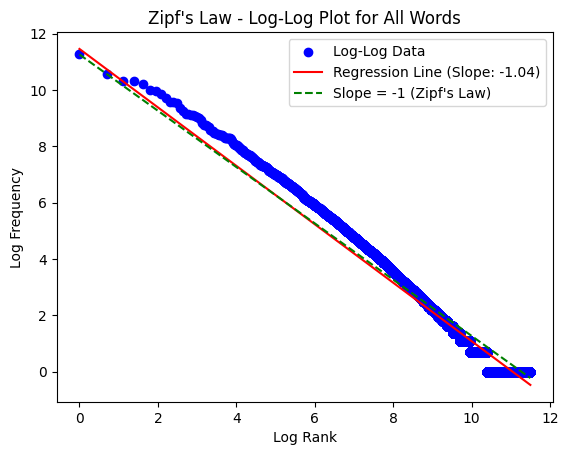

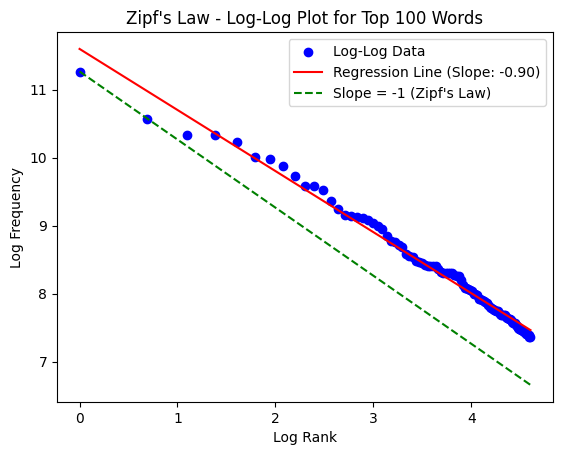

In [2]:
# Importing Data
messagedf = pd.read_csv("messagedata.csv")
messagedf['Message'] = messagedf['Message'].fillna('')

# Counting Number of Words and Sorting
words = ' '.join(messagedf['Message']).lower().split()
word_counts = Counter(words)
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
sorted_word_counts_100 = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:100]

# All Words

# Finding Ranks and Frequencies
ranks = np.arange(1, len(sorted_word_counts) + 1)
frequencies = np.array([count for word, count in sorted_word_counts])

# Log Transformations
log_ranks = np.log(ranks)
log_frequencies = np.log(frequencies)

# Econometric Regression
X = sm.add_constant(log_ranks)
model = sm.OLS(log_frequencies, X)
results = model.fit()

# Graphing Results 
zipf_line = log_frequencies[0] + (-1) * (log_ranks - log_ranks[0])

plt.scatter(log_ranks, log_frequencies, color='blue', label='Log-Log Data')
plt.plot(log_ranks, results.predict(X), color='red', label=f'Regression Line (Slope: {results.params[1]:.2f})')
plt.plot(log_ranks, zipf_line, color='green', linestyle='--', label='Slope = -1 (Zipf\'s Law)')
plt.xlabel('Log Rank')
plt.ylabel('Log Frequency')
plt.title('Zipf\'s Law - Log-Log Plot for All Words')
plt.legend()
plt.show()

# Top 100

# Finding Ranks and Frequencies
ranks_100 = np.arange(1, len(sorted_word_counts_100) + 1)
frequencies_100 = np.array([count for word, count in sorted_word_counts_100])

# Log Transformations
log_ranks_100 = np.log(ranks_100)
log_frequencies_100 = np.log(frequencies_100)

# Econometric Regression
X_100 = sm.add_constant(log_ranks_100)
model_100 = sm.OLS(log_frequencies_100, X_100)
results_100 = model_100.fit()

# Graphing Results 
zipf_line_100 = log_frequencies_100[0] + (-1) * (log_ranks_100 - log_ranks_100[0])

plt.scatter(log_ranks_100, log_frequencies_100, color='blue', label='Log-Log Data')
plt.plot(log_ranks_100, results_100.predict(X_100), color='red', label=f'Regression Line (Slope: {results_100.params[1]:.2f})')
plt.plot(log_ranks_100, zipf_line_100, color='green', linestyle='--', label='Slope = -1 (Zipf\'s Law)')
plt.xlabel('Log Rank')
plt.ylabel('Log Frequency')
plt.title('Zipf\'s Law - Log-Log Plot for Top 100 Words')
plt.legend()
plt.show()

In [3]:

# Extract the slope and its standard error
slope = results.params[1]
std_err = results.bse[1]

# Calculate the t-statistic
t_stat = (slope - (-1)) / std_err

# Degrees of freedom (number of observations - number of parameters)
df = len(log_ranks) - 2  # 2 parameters: slope and intercept

# Calculate the p-value for a two-tailed t-test
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))
print(f"Slope: {slope:.4f}, t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

# Repeat for Top 100 Words
slope_100 = results_100.params[1]
std_err_100 = results_100.bse[1]
t_stat_100 = (slope_100 - (-1)) / std_err_100
df_100 = len(log_ranks_100) - 2
p_value_100 = 2 * (1 - stats.t.cdf(abs(t_stat_100), df_100))
print(f"Slope (Top 100): {slope_100:.4f}, t-statistic: {t_stat_100:.4f}, p-value: {p_value_100:.4f}")

Slope: -1.0383, t-statistic: -39.9823, p-value: 0.0000
Slope (Top 100): -0.8972, t-statistic: 10.5502, p-value: 0.0000


### Description

According to our statistical exploration, the slopes found in the previous problem are statistically different than the zipf's law slope of -1. Since the t scores are large and the p values are small, this means that we reject the null hypothesis. The standard deviations that result from the regression are extremely small, which is what causes a high t score and therefore a statistically significant difference between the slope produced and the -1 slope of the null hypothesis. 

## Task B

In [21]:
# ChatGPT Support
# Set up ChromeDriver path
driver_path = "/Users/ramzikattan/Downloads/chromedriver-mac-arm64/chromedriver"
chrome_path = "/Applications/Google Chrome.app/Contents/MacOS/Google Chrome"

# Configure Chrome options
chrome_options = Options()
chrome_options.binary_location = chrome_path

# Set up the Chrome WebDriver service
service = Service(driver_path)
driver = webdriver.Chrome(service=service, options=chrome_options)

# Open the webpage
carurl = "https://www.kbb.com/car-make-model-list/used/view-all/make/"
driver.get(carurl)
time.sleep(5)  # Wait for the page to load

# Parse the page with BeautifulSoup
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# Close the browser after fetching the page
driver.quit()

# Find all table rows
rows = soup.find_all("tr")
print(f"Number of rows fetched: {len(rows)}")

make_model_data = []

# Loop through each row and extract make, model, and years
for row in rows:
    tds = row.find_all("td", class_="css-irk93x ee33uo33")
    
    # Check if the expected number of <td> elements exist
    if len(tds) >= 3:
        try:
            # Extract model from the second <td>
            model_td = tds[0]
            model = model_td.find("div", class_="css-z687n ee33uo36").get_text(strip=True)
            
            # Extract make from the third <td>
            make_td = tds[1]
            make = make_td.find("div", class_="css-z687n ee33uo36").get_text(strip=True)
            
            # Append the extracted data
            make_model_data.append({
                "make": make,
                "model": model,
            })
        except Exception as e:
            print(f"Error parsing row: {e}")

makemodeldf = pd.DataFrame(make_model_data)
makemodeldf.to_csv("make_model_data.csv")

Number of rows fetched: 1417


In [153]:
# Merging the two dataframes to account for most car brands
makemodeldf['make'] = makemodeldf['make'].str.lower()
makemodeldf['model'] = makemodeldf['model'].str.lower()
print(len(makemodeldf))

makemodeldf2 = pd.read_csv("Replacement_words.csv")
makemodeldf2.rename(columns={'Brand': 'make'}, inplace=True)
makemodeldf2.rename(columns={'Model': 'model'}, inplace=True)
makemodeldf2['make'] = makemodeldf2['make'].str.lower()
makemodeldf2['model'] = makemodeldf2['model'].str.lower()
print(len(makemodeldf2))

# Save to CSV
mergedmakemodel = pd.concat([makemodeldf, makemodeldf2], ignore_index=True)
mergedmakemodel = mergedmakemodel.drop_duplicates()
mergedmakemodel.to_csv("merged.csv")
print(len(mergedmakemodel))

1416
539
1730


In [16]:
mergedmakemodel = pd.read_csv('merged.csv')

In [17]:
mergedmakemodel.head()

,Unnamed: 0,make,model
0,0,acura,cl
1,1,acura,ilx
2,2,acura,integra
3,3,acura,legend
4,4,acura,mdx


In [18]:
mergedmakemodel = mergedmakemodel.drop('Unnamed: 0', axis=1)

In [19]:
mergedmakemodel.head()

,make,model
0,acura,cl
1,acura,ilx
2,acura,integra
3,acura,legend
4,acura,mdx


In [20]:
stop_words = set(stopwords.words('english'))
model_to_brand = dict(zip(mergedmakemodel['model'].str.lower(), mergedmakemodel['make'].str.lower()))
brands_set = set(model_to_brand.values())

def replacements(message, model_to_brand, brands_set):
    words = re.findall(r'\w+', message.lower())
    replaced_words = [model_to_brand.get(word, word) for word in words]

    # Create a new message with replaced words
    new_message = ' '.join(replaced_words)

    # Filter the replaced words for the list
    filtered_brands = set([word for word in replaced_words if word not in stop_words and word in brands_set])

    return filtered_brands, new_message 

messages = messagedf['Message']
brand_counter = Counter()

for message in messages:
    brands, new_message = replacements(message, model_to_brand, brands_set)
    brand_counter.update(brands)

brands_to_remove = ['car', 'sedan', 'problem', 'seat', 'mini']

for brand in brands_to_remove:
    brand_counter.pop(brand, None)

top_10 = brand_counter.most_common(10)

print("Top 10 Brands by Frequency:")
for brand, count in top_10:
    print(f"{brand.capitalize()}: {count}")


Top 10 Brands by Frequency:
Infiniti: 11162
Lexus: 9380
Bmw: 5112
Acura: 3232
Polestar: 2365
Audi: 2234
Honda: 1691
Cadillac: 1319
Toyota: 1000
Nissan: 835


## Task C

In [21]:
import itertools
import pandas as pd
from collections import Counter
import re

top_10_brands = [brand for brand, count in top_10]

def find_co_occurrences(message, top_10_brands, distance=7):
    words = message.split()
    found_brands = []
    
    for i, word in enumerate(words):
        if word in top_10_brands:
            found_brands.append((word, i)) 
    
    co_occurrences = set()
    for (brand1, idx1), (brand2, idx2) in itertools.combinations(found_brands, 2):
        if abs(idx1 - idx2) <= distance:  # Check distance in terms of word indices
            co_occurrences.add(tuple(sorted((brand1, brand2))))  # Use sorted tuple for co-occurrence
    
    return co_occurrences

brand_counter = Counter()
co_occurrence_counter = Counter()

total_messages = len(messagedf)

# Loop through all messages to update counters
for message in messagedf['Message']:
    filtered_brands, replaced_message = replacements(message, model_to_brand, brands_set)
    # Update brand counter with the filtered brands
    brand_counter.update(filtered_brands)
    
    # Now find co-occurrences using the replaced message
    co_occurrences = find_co_occurrences(replaced_message, top_10_brands, distance=10)
    co_occurrence_counter.update(co_occurrences)

    
def calculate_lift(brand1, brand2, brand_counter, co_occurrence_counter, total_messages):
    P_A = brand_counter[brand1] / total_messages 
    P_B = brand_counter[brand2] / total_messages  
    
    # Combine counts for both (brand1, brand2) and (brand2, brand1)
    P_AB = (co_occurrence_counter[(brand1, brand2)] + co_occurrence_counter[(brand2, brand1)]) / total_messages #if (brand1, brand2) in co_occurrence_counter or (brand2, brand1) in co_occurrence_counter else 0
    
    if P_A * P_B == 0: 
        return 0
    return P_AB / (P_A * P_B)

lift_results = []
for (brand1, brand2) in itertools.combinations(top_10_brands, 2):
    lift = calculate_lift(brand1, brand2, brand_counter, co_occurrence_counter, total_messages)
    lift_results.append((brand1, brand2, lift))

lift_df = pd.DataFrame(lift_results, columns=['Brand1', 'Brand2', 'Lift'])
lift_df.sort_values(by='Lift', ascending=False, inplace=True)

lift_matrix = lift_df.pivot(index='Brand1', columns='Brand2', values='Lift')
lift_matrix = lift_matrix.combine_first(lift_matrix.T)
lift_matrix.fillna(0, inplace=True)

lift_df.to_csv('brand_lift_ratios.csv', index=False)
print(lift_matrix)

def replacements(message, model_to_brand, brands_set):
    words = re.findall(r'\w+', message.lower())
    replaced_words = [model_to_brand.get(word, word) for word in words]

    # Create a new message with replaced words
    new_message = ' '.join(replaced_words)

    # Filter the replaced words for the list
    filtered_brands = set([word for word in replaced_words if word not in stop_words and word in brands_set])
    return filtered_brands, new_message
print(co_occurrence_counter['acura', 'nissan'])
print(co_occurrence_counter['nissan', 'acura'])
print("\n\n")
print(brand_counter)
print("\n\n")
print(co_occurrence_counter)
print("\n\n" + replaced_message + "\n\n")

             acura      audi       bmw  cadillac     honda  infiniti     lexus    nissan  polestar    toyota
acura     0.000000  0.806116  0.525698  0.668587  1.177504  0.868235  0.820409  0.528063  0.516147  0.385236
audi      0.806116  0.000000  0.773680  0.814540  0.357385  0.752579  0.657885  0.257336  1.016457  0.261880
bmw       0.525698  0.773680  0.000000  0.647407  0.300215  0.775023  0.732991  0.288175  0.536021  0.381481
cadillac  0.668587  0.814540  0.647407  0.000000  0.195043  0.781500  0.750522  0.136204  0.495315  0.272952
honda     1.177504  0.357385  0.300215  0.195043  0.000000  0.633422  0.540020  1.328006  0.390103  2.075833
infiniti  0.868235  0.752579  0.775023  0.781500  0.633422  0.000000  0.754208  0.783828  0.626791  0.532198
lexus     0.820409  0.657885  0.732991  0.750522  0.540020  0.754208  0.000000  0.589904  0.503782  0.626907
nissan    0.528063  0.257336  0.288175  0.136204  1.328006  0.783828  0.589904  0.000000  0.243082  1.868388
polestar  0.516147 

## Task D

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


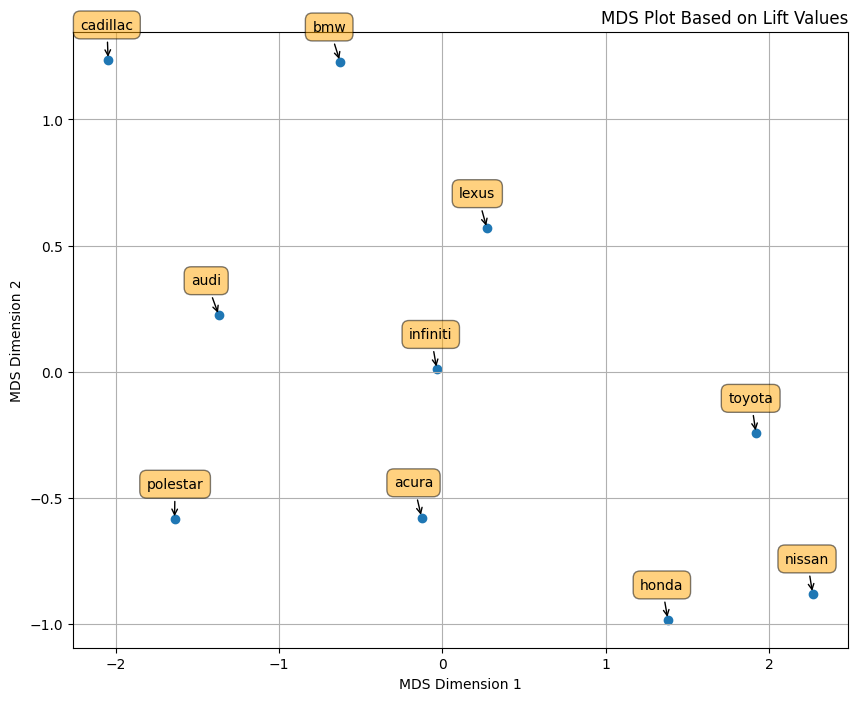

In [22]:
dissimilarity_matrix = 1 / (lift_matrix + 1e-10)
np.fill_diagonal(dissimilarity_matrix.values, 0)  # Set diagonal to zero

# Multidimensional Scaling (MDS)
seed = np.random.RandomState(seed=3)
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, 
                   random_state=seed, dissimilarity="precomputed")

try:
    results = mds.fit(dissimilarity_matrix)
    coords = results.embedding_
    
except ValueError as e:
    print(f"Error during MDS fitting: {e}")
    coords = np.zeros((len(lift_matrix), 2))  # Placeholder in case of error

# Plotting the MDS results
plt.figure(figsize=(10, 8))
plt.scatter(coords[:, 0], coords[:, 1], marker='o')

# Annotate each point with the corresponding brand name
for label, x, y in zip(lift_matrix.index, coords[:, 0], coords[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-20, 20),
                 textcoords='offset points', ha='left', va='bottom',
                 bbox=dict(boxstyle='round,pad=0.5', fc='orange', alpha=0.5),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Left-align the title
plt.title('MDS Plot Based on Lift Values', loc='right')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.grid(True)
plt.show()

## Task E

## Task F

In [24]:
import itertools
import pandas as pd
from collections import Counter
import re

top_10_brands = [brand for brand, count in top_10]
attributes = ['performance', 'luxury', 'price', 'interior', 'power']

def find_co_occurrences(message, top_10_brands, attributes):
    words = message.split()
    found_brands = []
    found_attributes = []

    for word in words:
        if word in top_10_brands:
            found_brands.append(word)
        if word in attributes:
            found_attributes.append(word)
    
    co_occurrences = set()
    for brand in found_brands:
        for attribute in found_attributes:
            co_occurrences.add((brand, attribute))  # No distance check, just record co-occurrences
    
    return co_occurrences

brand_counter = Counter()
attribute_counter = Counter()  # Counter for attributes
co_occurrence_counter = Counter()

total_messages = len(messagedf)

# Loop through all messages to update counters
for message in messagedf['Message']:
    filtered_brands, replaced_message = replacements(message, model_to_brand, brands_set)
    
    # Update brand counter with the filtered brands
    brand_counter.update(filtered_brands)
    
    # Count attributes in the message
    for word in replaced_message.split():
        if word in attributes:
            attribute_counter[word] += 1
    
    # Find co-occurrences with attributes
    co_occurrences = find_co_occurrences(replaced_message, top_10_brands, attributes)
    co_occurrence_counter.update(co_occurrences)

def calculate_lift(brand, attribute, brand_counter, attribute_counter, co_occurrence_counter, total_messages):
    P_A = brand_counter[brand] / total_messages 
    P_B = attribute_counter[attribute] / total_messages if attribute in attribute_counter else 0
    P_AB = co_occurrence_counter[(brand, attribute)] / total_messages if (brand, attribute) in co_occurrence_counter else 0
    
    if P_A * P_B == 0: 
        return 0
    return P_AB / (P_A * P_B)

# Create a DataFrame for lifts
lift_results = []

for brand in top_10_brands:
    for attribute in attributes:
        lift = calculate_lift(brand, attribute, brand_counter, attribute_counter, co_occurrence_counter, total_messages)
        lift_results.append((brand, attribute, lift))

# Create a DataFrame with brands as rows and attributes as columns
lift_df = pd.DataFrame(lift_results, columns=['Brand', 'Attribute', 'Lift'])

# Pivot the DataFrame to have brands in rows and attributes in columns
final_lift_matrix = lift_df.pivot(index='Brand', columns='Attribute', values='Lift')

# Fill any NaN values with 0
final_lift_matrix.fillna(0, inplace=True)

# Save to CSV if needed
final_lift_matrix.to_csv('brand_attribute_lift_ratios.csv', index=True)

# Print the final lift matrix
print(final_lift_matrix)

Attribute  interior    luxury  performance     power     price
Brand                                                         
acura      1.149388  1.050638     1.068455  1.234257  1.085862
audi       1.345691  1.050859     1.099397  1.518328  1.222916
bmw        0.918754  0.899339     1.064452  1.151825  1.195834
cadillac   1.573190  1.186565     1.092033  1.032264  1.233022
honda      1.209149  1.264346     1.157572  1.454970  1.206433
infiniti   0.826130  0.734876     0.812317  0.911650  0.846110
lexus      0.897827  0.879701     0.932515  1.024999  0.980237
nissan     0.969785  1.029217     1.046807  1.516177  0.965324
polestar   1.074273  0.847889     1.087952  1.595830  1.254709
toyota     1.103312  1.669883     1.218793  1.027139  1.198368


interior: cadillac, audi, <- two highest, least mentioned with interior --> infiniti, lexus 

Cadillac and Audi appear to referred to the most when discussing interior while infiniti and lexus appear the least. 

luxury: toyota, honda , least: infiniti, polestar

Toyota and Honda are mentioned the most when discussing luxury while infiniti and polestar and mentioned the least. 

performance: 

power: 

price: 




In [31]:
# we have to go back through messagedata_final.csv and convert aspirational phrases to "aspire"

aspirational_phrases = [
    'i want this car', 'forever car', 'wish i had', 'dream car', 'desire', 'my favorite', 'i wish', 'must have', 'can’t wait to drive', 'ultimate goal', 'someday car', 'my future car', 
    'hope to own', 'bucket list car', 'always wanted', 'the one for me', 'perfect car','my ideal ride', 'one day it will be mine', 'dreaming of this car', 'can see myself driving this',
    'this car is my goal'
]
# Create a case-insensitive regex pattern from the list of phrases
pattern = re.compile('|'.join(re.escape(phrase) for phrase in aspirational_phrases), re.IGNORECASE)

In [ ]:
# Function to replace any matching phrase with 'aspire'
def replace_aspirational_phrases(message):
    return pattern.sub('aspire', message)

# Apply the function to the 'Message' column
df['Modified_Message'] = df['Message'].apply(replace_aspirational_phrases)

# Display the new DataFrame with the modified message
print(df)

In [ ]:
import itertools
import pandas as pd
from collections import Counter
import re

top_10_brands = [brand for brand, count in top_10]
attributes = ['performance', 'luxury', 'price', 'interior', 'power']

def find_co_occurrences(message, top_10_brands, attributes):
    words = message.split()
    found_brands = []
    found_attributes = []

    for word in words:
        if word in top_10_brands:
            found_brands.append(word)
        if word in attributes:
            found_attributes.append(word)
    
    co_occurrences = set()
    for brand in found_brands:
        for attribute in found_attributes:
            co_occurrences.add((brand, attribute))  # No distance check, just record co-occurrences
    
    return co_occurrences

brand_counter = Counter()
attribute_counter = Counter()  # Counter for attributes
co_occurrence_counter = Counter()

total_messages = len(messagedf)

# Loop through all messages to update counters
for message in messagedf['Message']:
    filtered_brands, replaced_message = replacements(message, model_to_brand, brands_set)
    
    # Update brand counter with the filtered brands
    brand_counter.update(filtered_brands)
    
    # Count attributes in the message
    for word in replaced_message.split():
        if word in attributes:
            attribute_counter[word] += 1
    
    # Find co-occurrences with attributes
    co_occurrences = find_co_occurrences(replaced_message, top_10_brands, attributes)
    co_occurrence_counter.update(co_occurrences)

def calculate_lift(brand, attribute, brand_counter, attribute_counter, co_occurrence_counter, total_messages):
    P_A = brand_counter[brand] / total_messages 
    P_B = attribute_counter[attribute] / total_messages if attribute in attribute_counter else 0
    P_AB = co_occurrence_counter[(brand, attribute)] / total_messages if (brand, attribute) in co_occurrence_counter else 0
    
    if P_A * P_B == 0: 
        return 0
    return P_AB / (P_A * P_B)

# Create a DataFrame for lifts
lift_results = []

for brand in top_10_brands:
    for attribute in attributes:
        lift = calculate_lift(brand, attribute, brand_counter, attribute_counter, co_occurrence_counter, total_messages)
        lift_results.append((brand, attribute, lift))

# Create a DataFrame with brands as rows and attributes as columns
lift_df = pd.DataFrame(lift_results, columns=['Brand', 'Attribute', 'Lift'])

# Pivot the DataFrame to have brands in rows and attributes in columns
final_lift_matrix = lift_df.pivot(index='Brand', columns='Attribute', values='Lift')

# Fill any NaN values with 0
final_lift_matrix.fillna(0, inplace=True)

# Save to CSV if needed
final_lift_matrix.to_csv('brand_attribute_lift_ratios.csv', index=True)

# Print the final lift matrix
print(final_lift_matrix)